In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [44]:
df = pd.read_csv('Cust_Segmentation.csv')

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [45]:
df.replace(np.nan,0, inplace = True)

In [46]:
target = df['Defaulted']
df = df.drop(['Customer Id', 'Address', 'Defaulted'], axis=1)

In [13]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [14]:
scaler = StandardScaler()
df[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']] = scaler.fit_transform(df)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507


In [15]:
Sum_of_Squares = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    Sum_of_Squares.append(kmeans.inertia_)

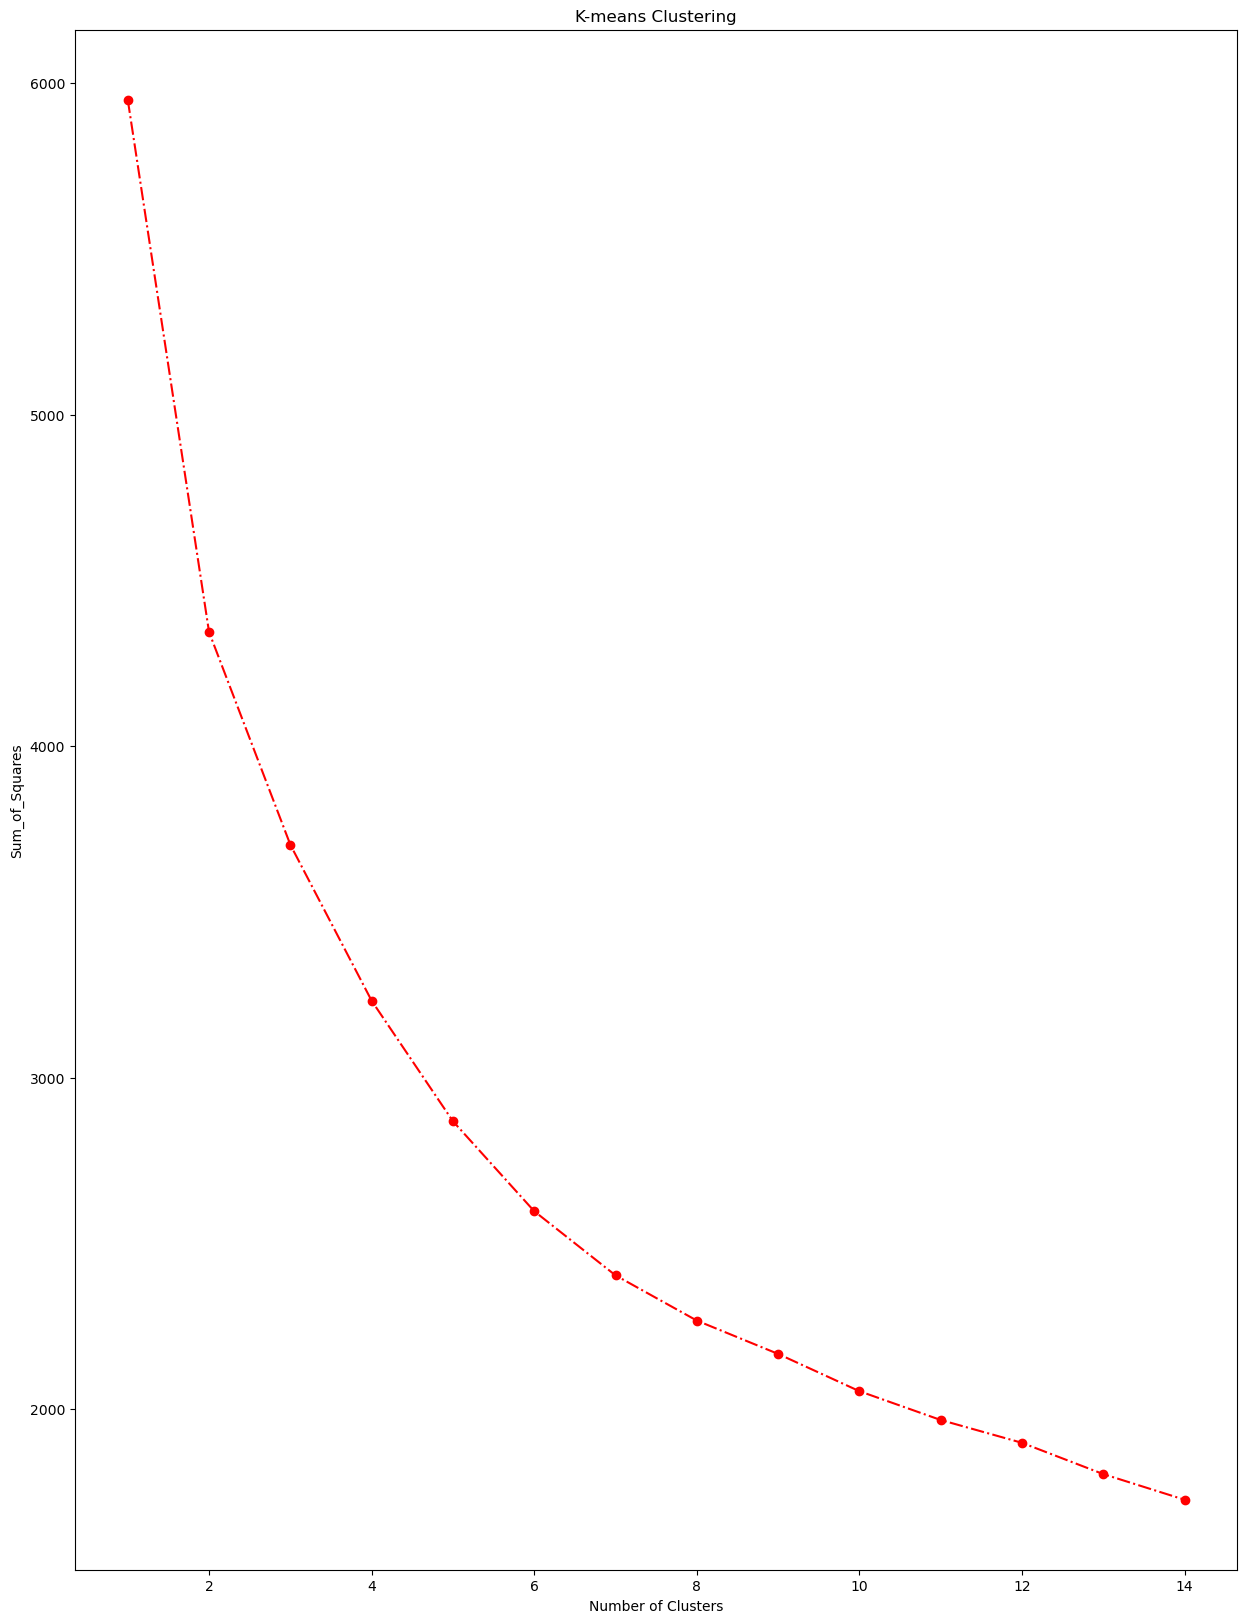

In [16]:
plt.figure(figsize = (15,20))
plt.plot(range(1, 15), Sum_of_Squares, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum_of_Squares')
plt.title('K-means Clustering')
plt.show()

# k = 4

In [17]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [18]:
kmeans.fit(df)
y_mean = kmeans.fit_predict(df)
y_mean

array([1, 3, 2, 1, 3, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2,
       2, 0, 3, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 2, 3,
       2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 3, 0, 0, 2, 3, 1, 0, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 3, 0, 0, 1, 3, 1, 1, 1, 0,
       0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 3, 2, 0, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 2, 1, 1, 3, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0,
       3, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 3, 1, 2, 0, 1, 2, 2, 1, 3, 1, 0, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 3, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0,

# Making a new feature which will show which cluster 1 row belongs to

In [19]:
df['K'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,K
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525,1
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387,3
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554,2
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525,1
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507,3


In [ ]:
for i in df:
    for j in df:
        if i == j:
            continue
        x_axis = df[i]
        y_axis = df[j]
        plt.figure(figsize = (10, 8))
        color_map = plt.cm.get_cmap('hsv', len(np.unique(df['K'])))
        plt.scatter(x_axis, y_axis, c=df['K'],cmap=color_map)
        plt.title('Segmentation K-means')
        plt.show()

# Q1. When should we split the data into training and testing sets when using K-means clustering, and why?

If you are using K-means clustering as a pre-processing step for a supervised learning task, such as classification or regression, then you may need to split the data into training and testing sets. In this case, you would typically apply K-means clustering to the training data only and then use the resulting cluster assignments as features in your supervised learning model. You would then evaluate the performance of your model on the testing data to ensure that it generalizes well to new, unseen data.

# Q2. Why do we need to scale the features before performing K-means clustering?

K-means clustering is a distance-based algorithm, and the distances between data points are sensitive to the scale of the features. When the features are on different scales, K-means clustering may be biased towards features with larger scales, which can lead to incorrect cluster assignments and poor clustering performance.